<a href="https://colab.research.google.com/github/gizattos/cost_of_living_clustering/blob/master/cost_of_living_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:

## importando bibliotecas
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
import warnings
warnings.filterwarnings('ignore')
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn import preprocessing


<h1>Lendo CSV</h1>

In [919]:
## realizando transposição de colunas
df = pd.read_csv('/content/cost-of-living.csv',index_col=[0]).T.reset_index()
df = df.rename(columns={'index':'local'})
df.head()

,local,"Meal, Inexpensive Restaurant","Meal for 2 People, Mid-range Restaurant, Three-course",McMeal at McDonalds (or Equivalent Combo Meal),Domestic Beer (0.5 liter draught),Imported Beer (0.33 liter bottle),Coke/Pepsi (0.33 liter bottle),Water (0.33 liter bottle),"Milk (regular), (1 liter)",Loaf of Fresh White Bread (500g),Eggs (regular) (12),Local Cheese (1kg),Water (1.5 liter bottle),Bottle of Wine (Mid-Range),Domestic Beer (0.5 liter bottle),Imported Beer (0.33 liter bottle),Cigarettes 20 Pack (Marlboro),One-way Ticket (Local Transport),"Chicken Breasts (Boneless, Skinless), (1kg)",Monthly Pass (Regular Price),Gasoline (1 liter),Volkswagen Golf,Apartment (1 bedroom) in City Centre,Apartment (1 bedroom) Outside of Centre,Apartment (3 bedrooms) in City Centre,Apartment (3 bedrooms) Outside of Centre,"Basic (Electricity, Heating, Cooling, Water, Garbage) for 85m2 Apartment",1 min. of Prepaid Mobile Tariff Local (No Discounts or Plans),"Internet (60 Mbps or More, Unlimited Data, Cable/ADSL)","Fitness Club, Monthly Fee for 1 Adult",Tennis Court Rent (1 Hour on Weekend),"Cinema, International Release, 1 Seat",1 Pair of Jeans (Levis 501 Or Similar),"1 Summer Dress in a Chain Store (Zara, H&M, ...)",1 Pair of Nike Running Shoes (Mid-Range),1 Pair of Men Leather Business Shoes,Price per Square Meter to Buy Apartment in City Centre,Price per Square Meter to Buy Apartment Outside of Centre,Average Monthly Net Salary (After Tax),"Mortgage Interest Rate in Percentages (%), Yearly, for 20 Years Fixed-Rate",Taxi Start (Normal Tariff),Taxi 1km (Normal Tariff),Taxi 1hour Waiting (Normal Tariff),Apples (1kg),Oranges (1kg),Potato (1kg),Lettuce (1 head),Cappuccino (regular),"Rice (white), (1kg)",Tomato (1kg),Banana (1kg),Onion (1kg),Beef Round (1kg) (or Equivalent Back Leg Red Meat),Toyota Corolla 1.6l 97kW Comfort (Or Equivalent New Car),"Preschool (or Kindergarten), Full Day, Private, Monthly for 1 Child","International Primary School, Yearly for 1 Child"
0,"Saint Petersburg, Russia",7.34,29.35,4.40,2.20,2.20,0.76,0.53,0.98,0.71,1.18,7.60,0.63,5.87,0.88,1.89,2.20,0.59,3.96,42.56,0.67,19289.39,524.45,344.27,1012.53,615.19,102.17,0.03,6.96,26.27,18.33,5.14,71.86,38.25,74.88,100.72,2476.05,1507.70,645.94,10.29,1.47,0.26,4.40,1.29,1.25,0.56,0.86,1.96,0.92,1.91,0.89,0.48,7.18,19305.29,411.83,5388.86
1,"Istanbul, Turkey",4.58,15.28,3.82,3.06,3.06,0.64,0.24,0.71,0.36,1.62,5.32,0.33,7.64,1.79,2.48,2.75,0.41,3.50,31.32,1.05,24443.15,291.55,177.72,545.50,314.98,59.33,0.11,14.20,25.10,15.66,3.82,36.15,25.91,61.31,50.58,1315.18,657.05,436.00,19.08,0.76,0.47,3.59,0.85,0.86,0.59,0.61,1.84,1.30,0.80,1.91,0.62,9.73,20874.72,282.94,6905.43
2,"Izmir, Turkey",3.06,12.22,3.06,2.29,2.75,0.61,0.22,0.65,0.38,1.51,4.97,0.29,6.11,1.63,2.09,2.29,0.46,3.05,22.92,1.04,24443.15,212.22,128.36,353.76,225.34,51.07,0.09,12.89,20.64,11.67,3.06,33.20,22.48,52.74,42.20,856.54,508.14,392.07,22.23,0.61,0.57,3.51,0.77,0.73,0.52,0.57,1.56,1.31,0.70,1.78,0.58,8.61,20898.83,212.18,4948.41
3,"Helsinki, Finland",12.00,65.00,8.00,6.50,6.75,2.66,1.89,0.96,2.27,2.02,6.87,1.54,12.00,2.23,2.95,7.70,2.80,9.42,59.70,1.54,22000.00,986.93,758.13,1819.32,1271.16,82.66,0.07,22.31,34.54,24.72,14.00,83.41,31.41,82.49,120.97,7444.54,4099.36,2382.56,1.38,6.00,1.00,47.04,2.10,1.75,0.91,2.30,3.87,2.13,2.91,1.61,1.25,12.34,24402.77,351.60,1641.00
4,"Chisinau, Moldova",4.67,20.74,4.15,1.04,1.43,0.64,0.44,0.68,0.33,1.11,5.79,0.59,3.61,0.77,1.38,1.56,0.10,3.55,9.33,0.98,16335.12,244.49,177.96,428.67,330.84,113.46,0.07,8.58,26.64,12.10,5.19,56.54,35.37,86.25,94.38,904.82,589.13,286.95,9.42,1.30,0.18,3.11,0.70,1.22,0.56,0.84,1.25,0.93,1.56,1.37,0.59,5.37,17238.13,210.52,2679.30


In [920]:
## quantidade de linhas e colunas
df.shape

(160, 56)

In [921]:
## dados faltantes
df.isna().sum()

local                                                                         0
Meal, Inexpensive Restaurant                                                  0
Meal for 2 People, Mid-range Restaurant, Three-course                         0
McMeal at McDonalds (or Equivalent Combo Meal)                                0
Domestic Beer (0.5 liter draught)                                             0
Imported Beer (0.33 liter bottle)                                             0
Coke/Pepsi (0.33 liter bottle)                                                0
Water (0.33 liter bottle)                                                     0
Milk (regular), (1 liter)                                                     0
Loaf of Fresh White Bread (500g)                                              0
Eggs (regular) (12)                                                           0
Local Cheese (1kg)                                                            0
Water (1.5 liter bottle)                

In [0]:
## criano nova columa média
df['media'] = df.sum(axis=1)/55

In [0]:
## guardando nomes reais das localidades e media
local = df.local
mean = df.media

In [0]:
## codificando valores utilizando MinMax
le = preprocessing.LabelEncoder()
df['local'] = le.fit_transform(df['local'])
le = preprocessing.MinMaxScaler()
df_features = le.fit_transform(df.values)
df_minMax = pd.DataFrame(df_features, index=df.index, columns=df.columns)


In [925]:
df_minMax.head()

,local,"Meal, Inexpensive Restaurant","Meal for 2 People, Mid-range Restaurant, Three-course",McMeal at McDonalds (or Equivalent Combo Meal),Domestic Beer (0.5 liter draught),Imported Beer (0.33 liter bottle),Coke/Pepsi (0.33 liter bottle),Water (0.33 liter bottle),"Milk (regular), (1 liter)",Loaf of Fresh White Bread (500g),Eggs (regular) (12),Local Cheese (1kg),Water (1.5 liter bottle),Bottle of Wine (Mid-Range),Domestic Beer (0.5 liter bottle),Imported Beer (0.33 liter bottle),Cigarettes 20 Pack (Marlboro),One-way Ticket (Local Transport),"Chicken Breasts (Boneless, Skinless), (1kg)",Monthly Pass (Regular Price),Gasoline (1 liter),Volkswagen Golf,Apartment (1 bedroom) in City Centre,Apartment (1 bedroom) Outside of Centre,Apartment (3 bedrooms) in City Centre,Apartment (3 bedrooms) Outside of Centre,"Basic (Electricity, Heating, Cooling, Water, Garbage) for 85m2 Apartment",1 min. of Prepaid Mobile Tariff Local (No Discounts or Plans),"Internet (60 Mbps or More, Unlimited Data, Cable/ADSL)","Fitness Club, Monthly Fee for 1 Adult",Tennis Court Rent (1 Hour on Weekend),"Cinema, International Release, 1 Seat",1 Pair of Jeans (Levis 501 Or Similar),"1 Summer Dress in a Chain Store (Zara, H&M, ...)",1 Pair of Nike Running Shoes (Mid-Range),1 Pair of Men Leather Business Shoes,Price per Square Meter to Buy Apartment in City Centre,Price per Square Meter to Buy Apartment Outside of Centre,Average Monthly Net Salary (After Tax),"Mortgage Interest Rate in Percentages (%), Yearly, for 20 Years Fixed-Rate",Taxi Start (Normal Tariff),Taxi 1km (Normal Tariff),Taxi 1hour Waiting (Normal Tariff),Apples (1kg),Oranges (1kg),Potato (1kg),Lettuce (1 head),Cappuccino (regular),"Rice (white), (1kg)",Tomato (1kg),Banana (1kg),Onion (1kg),Beef Round (1kg) (or Equivalent Back Leg Red Meat),Toyota Corolla 1.6l 97kW Comfort (Or Equivalent New Car),"Preschool (or Kindergarten), Full Day, Private, Monthly for 1 Child","International Primary School, Yearly for 1 Child",media
0,0.748428,0.270458,0.214236,0.167961,0.137198,0.100705,0.131285,0.127036,0.262222,0.188854,0.093886,0.235892,0.211340,0.118195,0.053672,0.136243,0.062909,0.125641,0.070367,0.239981,0.178344,0.147889,0.129025,0.108230,0.135184,0.107459,0.338557,0.046512,0.028362,0.137406,0.535465,0.184975,0.574003,0.490665,0.413687,0.507578,0.070084,0.070560,0.075688,0.188332,0.131658,0.029851,0.051927,0.118893,0.159259,0.084507,0.277311,0.284141,0.077220,0.288355,0.135762,0.073016,0.072246,0.144916,0.173699,0.136710,0.147423
1,0.396226,0.142857,0.075711,0.111650,0.220290,0.187311,0.097765,0.032573,0.142222,0.080495,0.189956,0.119980,0.056701,0.184191,0.182203,0.214286,0.090589,0.079487,0.050262,0.171519,0.420382,0.224518,0.051204,0.040188,0.048306,0.035152,0.165087,0.232558,0.109848,0.122909,0.450918,0.091425,0.158819,0.195309,0.259166,0.157365,0.027321,0.021223,0.042721,0.374128,0.060302,0.082090,0.040858,0.047231,0.087037,0.092958,0.172269,0.257709,0.150579,0.083179,0.473510,0.117460,0.133047,0.172851,0.113961,0.181774,0.173245
2,0.402516,0.072584,0.045584,0.037864,0.145894,0.156093,0.089385,0.026059,0.115556,0.086687,0.165939,0.102186,0.036082,0.127144,0.159605,0.162698,0.067438,0.092308,0.030594,0.120356,0.414013,0.224518,0.024696,0.020022,0.012638,0.013562,0.131641,0.186047,0.095104,0.067650,0.324573,0.037562,0.124520,0.113212,0.161581,0.098834,0.010426,0.012587,0.035823,0.440710,0.045226,0.106965,0.039765,0.034202,0.062963,0.073239,0.155462,0.196035,0.152510,0.064695,0.430464,0.104762,0.106342,0.173280,0.081165,0.123623,0.155524
3,0.358491,0.485899,0.565226,0.517476,0.552657,0.558912,0.662011,0.570033,0.253333,0.671827,0.277293,0.198780,0.680412,0.346756,0.244350,0.276455,0.339708,0.692308,0.309003,0.344378,0.732484,0.188191,0.283559,0.277307,0.285265,0.265451,0.259556,0.139535,0.201125,0.239871,0.737809,0.812899,0.708290,0.326951,0.500342,0.649019,0.253107,0.220872,0.348387,0.000000,0.586935,0.213930,0.634600,0.250814,0.251852,0.183099,0.882353,0.704846,0.310811,0.473198,0.374172,0.317460,0.

<h2>Clusterizando utilizando todos os dados presentes</h2>

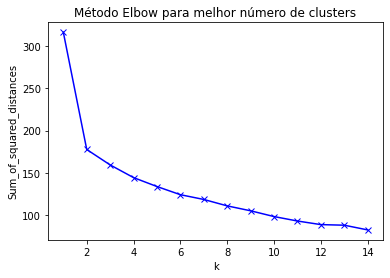

In [926]:
## descobrindo a melhor quantidade de clusters através do método elbow
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(df_minMax)
    Sum_of_squared_distances.append(km.inertia_)
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Método Elbow para melhor número de clusters')
plt.show()

In [927]:
## descobrindo a melhor quantidade de clusters através do método elbow
for k in range(2, 21):
    kmeans_model = KMeans(n_clusters=k, random_state=1).fit(df_minMax)
    labels = kmeans_model.labels_
    labels = kmeans_model.labels_
    print (k, metrics.calinski_harabaz_score(df_minMax, labels))

2 123.71319709217052
3 77.56135879935665
4 62.20964325280657
5 53.340975600178666
6 48.21186608826126
7 42.8286949199894
8 40.21963636939824
9 38.24225957037973
10 36.00339298400224
11 33.9731029451027
12 33.04915072726885
13 32.480179706232825
14 31.428345956553382
15 30.180712939905543
16 29.594013536057716
17 29.40295938868366
18 28.232161749674585
19 28.86553348249012
20 28.14539562528673


Ambos os métodos chegaram a uma quantidade de 2 clusters, como melhor quantidade

In [928]:
## Treinando com coluna de média
kmeans = KMeans(n_clusters=2)
kmeans.fit(df_minMax)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [929]:
print(kmeans.cluster_centers_)

[[0.48245283 0.17486824 0.16090676 0.176      0.11036715 0.13685801
  0.15854749 0.14368078 0.21826667 0.19591331 0.16170306 0.18540417
  0.17494845 0.16256525 0.08320621 0.12097884 0.10684952 0.13507692
  0.08312937 0.11658424 0.40165605 0.14203311 0.08913207 0.07836977
  0.09227823 0.07881638 0.28614634 0.17465116 0.17722679 0.18036675
  0.32412603 0.19103473 0.33177421 0.34241264 0.3547381  0.30842635
  0.05851951 0.05797394 0.07069105 0.15580004 0.11594975 0.10783582
  0.07300765 0.13159609 0.14898148 0.11521127 0.21462185 0.25213656
  0.09737452 0.14861368 0.21337748 0.14619048 0.07268479 0.15356049
  0.08802798 0.13069504 0.13897655]
 [0.52924528 0.50709663 0.47163697 0.47411003 0.45441224 0.44405841
  0.45917132 0.45119435 0.35792593 0.57987616 0.40171033 0.38054567
  0.52706186 0.30766841 0.22111582 0.22175926 0.40136722 0.55448718
  0.28889132 0.42946157 0.47749469 0.19225317 0.38206332 0.35567825
  0.37662771 0.35024093 0.47920783 0.34224806 0.46157944 0.37500103
  0.52860988

In [930]:
print(kmeans.labels_)

[0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 1 0 0 1 1 0 0 1 0 1 0 0 1 1
 0 1 1 1 1 0 1 1 1 1 1 1 0 1 1 0 1 0 1 0 0 0 0 0 1 1 0 1 0 0 1 0 1 1 1 0 1
 0 0 0 0 1 1 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 1 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 1 0 0 1 0 1 1 0 0 1 1 0 0 1
 0 0 0 0 0 1 1 1 1 1 0 0]


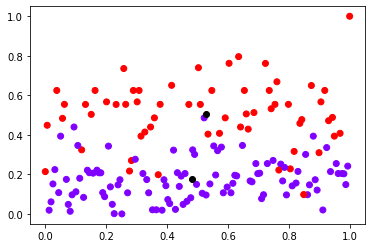

In [931]:
### plotando clusters de Meal, Inexpensive Restaurant (2 coluna)
plt.scatter(df_minMax.iloc[:,0],df_minMax.iloc[:,1], c=kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0] ,kmeans.cluster_centers_[:,1], color='black')

<h2>Clusterizando a média de valores</h2>

In [0]:
le = preprocessing.StandardScaler()
df_features = le.fit_transform(df.values)
df = pd.DataFrame(df_features, index=df.index, columns=df.columns)

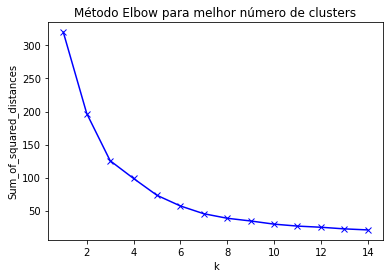

In [933]:
## descobrindo a melhor quantidade de clusters através do método elbow
df_media = df[['local','media']]
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(df_media)
    Sum_of_squared_distances.append(km.inertia_)
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Método Elbow para melhor número de clusters')
plt.show()

In [934]:
## descobrindo a melhor quantidade de clusters através do método elbow
for k in range(2, 15):
    kmeans_model = KMeans(n_clusters=k, random_state=1).fit(df_media)
    labels = kmeans_model.labels_
    labels = kmeans_model.labels_
    print (k, metrics.calinski_harabaz_score(df_media, labels))

2 98.68982038677481
3 121.60118805856627
4 116.69313257100751
5 130.8228965315835
6 141.13148302440496
7 154.91135466447685
8 158.8443983005996
9 159.44741281389477
10 159.4299220672586
11 158.2357605119555
12 163.3468673204468
13 159.592005504162
14 159.66901573130784


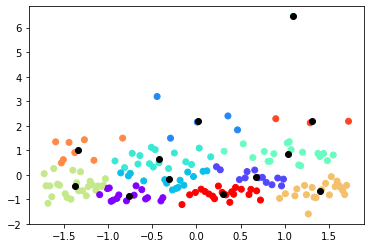

In [935]:

kmeans = KMeans(n_clusters=12)
kmeans.fit(df_media)
plt.scatter(df_media.iloc[:,0],df_media.iloc[:,1], c=kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0] ,kmeans.cluster_centers_[:,1], color='black')


In [936]:
## y = kmeans.fit_predict(df[['Feat_1', 'Feat_2', 'Feat_3', 'Feat_4']])
y = kmeans.fit_predict(df_media)
df_media['Cluster'] = y
df_media.head()

,local,media,Cluster
0,0.855217,-0.408609,11
1,-0.357242,-0.200453,0
2,-0.335591,-0.343307,2
3,-0.487149,0.315522,0
4,-0.898519,-0.964566,2


In [937]:
## criando nova coluna com os nomes reais
df_media['local_desc'] = local
df_media.sort_values('media').head(50)

,local,media,Cluster,local_desc
63,1.266587,-1.597030,9,"Tbilisi, Georgia"
123,-0.162383,-1.215439,2,"Kolkata, India"
106,-1.677957,-1.164061,7,"Ahmedabad, India"
83,0.378894,-1.122984,1,"Noida, India"
81,-0.963472,-1.082465,2,"Chandigarh, India"
118,-0.400545,-1.067017,2,"Hyderabad, India"
114,-0.790264,-1.064266,2,"Delhi, India"
112,-0.941821,-1.035714,2,"Chennai, India"
130,0.725310,-1.031263,1,"Pune, India"
7,-1.418144,-0.998516,7,"Banja Luka, Bosnia And Herzegovina"


In [0]:
df_media.to_csv('lugares', sep='\t')